(sec:response_external_fields)=
# Responses to external fields

Compared to atomic fields, the externally applied electromagnetic fields are several orders of magnitude weaker and perturbation theory is called for and a main merit of such an approach is that the response functions defined in perturbation theory provide the natural meeting point between experiment and theory with a distinct separation of one-, two-, three-photon, etc., optical processes

Response theory {cite}`Norman2018` may be thought of as a reformulation of standard time-dependent perturbation theory into a form suitable for approximate state theory. Virtually all spectroscopic properties are encompassed by the theory as possible perturbations include

- time-independent or time-dependent 
- electric or magnetic
- internal or external
- geometric distortions

The derivation of expressions for response functions can appear very different from one source to another and the vast number of technicalities can at first appear overwhelming. The principle, however, is quite straightforward and clear: Form a well-defined quantity of interest, e.g., the electric dipole moment, $\mu(t)$, and identify response functions in the order expansions of these quantities.

## Defining the system

In the following, we assume that the system is described by a Hamiltonian of the form

$$
\hat{H} = \hat{H}_0 + \hat{V}(t) 
$$

where $\hat{H}_0$ is the Hamiltonian of the isolated system and $\hat{V}(t)$ described the quantum mechanical field-coupling. In the electric-dipole approximation, the coupling between the molecular system and external electric field is provided by minus the electric dipole moment operator, $-\hat{\mu}$, such that

$$
\hat{V}(t) = - \hat{\mu} F(t)
$$

where $F(t)$ is the electric field amplitude. For simplicity, we assume the external electric field to be monochromatic and adiabatically switched on at time zero according to

$$
F(t) = F^\omega \sin \omega t \times \mathrm{erf}(a t)
$$

We further assume the solutions to the eigenvalue problem of $\hat{H}_0$ to be known

$$
  \hat{H}_0 | n \rangle = E_n  | n \rangle 
$$

such that it can be used as a basis in the calculation. Before being exposed to the perturbation, we assume the molecule to be in the molecular ground state, $| 0 \rangle$.



## Time propagation

With a time step $\Delta t$ that is small compared to the time variations in the Hamiltonian, we can approximate the Hamiltonian to be constant from time $t_0$ to $t_0 + \Delta t$. It is then possible to perform a time integration of the Schröinger equation using

\begin{equation*}
  \Psi(t_0 + \Delta t) = \hat{U}(t_0+\Delta t, t_0) \Psi(t_0) 
\end{equation*}

where the time-evolution propagator is defined as 

\begin{equation*}
  \hat{U}(t_0+\Delta t, t_0) = e^{-i \hat{H}(t_0) \Delta t / \hbar} 
\end{equation*}

Repeated applications of $\hat{U}$ allow us to determine the wave function in the region $t>0$ and, given the time-dependent wave function, the dipole moment is obtained as the expectation value of the electric dipole operator

\begin{equation*}
  \mu(t) = \langle \Psi(t) | \hat{\mu} | \Psi(t) \rangle
\end{equation*}


## Response functions

Response functions are defined as the expansion coefficients of Fourier expansions of time-dependent expectation values of an observable associated with an operator $\hat{\Omega}$

\begin{eqnarray*}
  \langle \Psi(t) | \hat{\Omega} | \Psi(t) \rangle & = &
  \langle 0 | \hat{\Omega} | 0 \rangle +
  \sum_{\omega}
  \langle \langle \hat{\Omega}; \hat{V} \rangle \rangle_{\omega}
  F^{\omega}
  e^{-i\omega t} +
  \cdots 
\end{eqnarray*}

```{note}
- In the general case, the coupling operator depends on the optical frequency of the external field, but in the electric-dipole approximation, it does not.
- Consistent use of Fourier expansions should be used for all time-dependent functions in the definition of response functions.
```

In the case of the observable being the electric dipole moment, the linear coupling coefficient to the external electric field is known as the electric-dipole polarizability

$$
\mu(t) = \mu^0 + \sum_\omega \alpha(\omega) F^\omega e^{-i\omega t} + \cdots
$$

such that

$$
\alpha(\omega) = - 
\langle \langle \hat{\mu}; \hat{\mu} \rangle \rangle_{\omega}
$$

## Two-level system

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import expm
from scipy.special import erf

The representation of an atomic system with two levels takes the form

$$
| \Psi(t) \rangle = 
a(t) | \Psi_a \rangle + b(t) | \Psi_b \rangle =
\begin{pmatrix}
a(t) \\ b(t)
\end{pmatrix}
$$

$$
\hat{H}_0 =
\begin{pmatrix}
E_a & 0 \\ 
0 & E_b \\
\end{pmatrix}; \qquad
\hat{\mu} =
\begin{pmatrix}
0 & \mu_{ab} \\ 
\mu_{ba} & 0 \\
\end{pmatrix}
$$

In [3]:
# Time
delta = 0.1
t = np.arange(0, 500, delta)
n = len(t)

# External electric field
Fw = 0.00005
w = 0.1
F = Fw * np.sin(w * t) * erf(0.01 * t)

# Time-dependent wave function
psi = np.zeros((2, n), dtype=complex)
psi[:, 0] = [1, 0]

# Energy of levels
Ea = 1
Eb = 1.5

# Transition dipole moment
muab = 1
muba = muab

# Hamiltonian and dipole moment operators
H0 = np.array([[Ea, 0], [0, Eb]])
mu = np.array([[0, muab], [muba, 0]])
V = -mu

# Time-dependent dipole moment (polarization)
P = np.zeros(n, dtype=float)
P[0] = np.dot(psi[:, 0], np.matmul(mu, psi[:, 0])).real

### Time propagation

In [4]:
for k in range(1, n):

    psi[:, k] = np.matmul(expm(-1j * (H0 + V * F[k - 1]) * delta), psi[:, k - 1])

    P[k] = np.dot(np.conjugate(psi[:, k]), np.matmul(mu, psi[:, k])).real

### Plotting observables

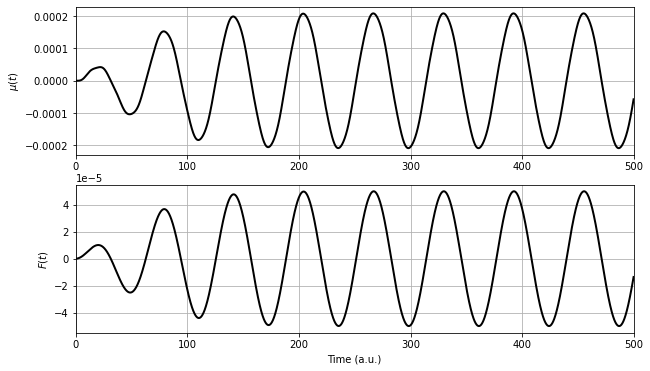

In [5]:
fig = plt.figure(figsize=(10, 6))

ax = plt.subplot(2, 1, 1, xlim=(0, 500))
plt.plot(t, P, "k-", linewidth=2.0)
plt.grid(True)
plt.ylabel(r"$\mu(t)$")

ax = plt.subplot(2, 1, 2, xlim=(0, 500))
plt.plot(t, F, "k-", linewidth=2.0)
plt.grid(True)
plt.ylabel(r"$F(t)$")

plt.xlabel("Time (a.u.)")

plt.show()

### Determining response functions

As nonlinear responses are negligible, the value of the linear response function (or polarizability) at the given optical frequency is simply the ratio of the induced dipole moment and the amplitude of the electric field

\begin{equation*}
  \alpha(\omega) =  \frac{\max[ \mu(t) ]}{F^\omega}
\end{equation*}

In [6]:
alpha_numerical = np.max(P) / Fw

print(f"Polarizability: {alpha_numerical : 4.2f} a.u.")

Polarizability:  4.17 a.u.


## Analytic response functions

In practice, we derive analytic expressions for the response functions with use of perturbation theory. This results in sum-over-state formulas such as that for the linear response function

\begin{equation*}
  \langle \langle \hat{\Omega}; \hat{V} \rangle \rangle_\omega =
  - \frac{1}{\hbar} \sum_{n>0} \left[
  \frac{\langle 0 | \hat{\Omega}  | n \rangle
        \langle n | \hat{V} | 0 \rangle }
       {\omega_{n0}-\omega}
+
  \frac{\langle 0 | \hat{V} | n \rangle
        \langle n | \hat{\Omega} | 0 \rangle }
       {\omega_{n0}+\omega} \right] 
\end{equation*}


In [7]:
Eba = Eb - Ea

alpha_analytic = muab * muba * (1.0 / (Eba - w) + 1.0 / (Eba + w))

print(f"Polarizability: {alpha_analytic : 4.2f} a.u.")

Polarizability:  4.17 a.u.


## Dispersion

The variations of response functions with optical frequencies are known as dispersions and values for non-oscillating fields ($\omega = 0$) are known as static values.

## Poles of response functions

Response functions have poles at transition energies and the associated residues are products of transition moments. 

Most excited state methods in computational chemistry are based on the principle of identifying excitation energies and spectrum intensities from a residue analysis of response functions.

In [27]:
epsilon = 0.02
wa = np.arange(0, Eba - epsilon, 0.001)
wb = np.arange(Eba + epsilon, 1, 0.001)

W = np.concatenate((wa, wb), axis=None)

alpha = muab * muba * (1.0 / (Eba - W) + 1.0 / (Eba + W))

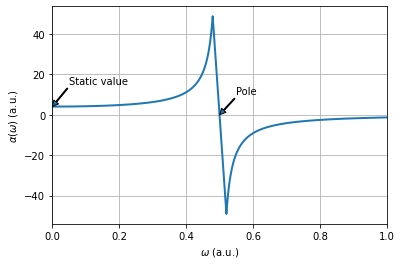

In [34]:
ax = plt.subplot(1, 1, 1, xlim=(0, 1))

plt.plot(W, alpha, lw = 2)

plt.ylabel(r"$\alpha(\omega)$ (a.u.)")
plt.xlabel(r"$\omega$ (a.u.)")

plt.annotate(
    "Static value",
    (0, alpha[0]),
    xytext=(0.05, 15),
    arrowprops={"width": 1, "headwidth": 6, "headlength": 6},
)

plt.annotate(
    "Pole",
    (Eba, 0),
    xytext=(0.55, 10),
    arrowprops={"width": 1, "headwidth": 6, "headlength": 6},
)

plt.grid(True)

plt.show()